In [1]:
import neural_net as NNC

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import  GridSearchCV, KFold, train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [1]:
from sklearn.utils.estimator_checks import check_estimator

from neural_net import NeuralNet

check_estimator(NeuralNet())

ValueError: shapes (20,5) and (1,1) not aligned: 5 (dim 1) != 1 (dim 0)

In [2]:
np.random.seed(2024)

# Loading in the data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)

# Define layer sizes and activations
network_input_size =  30
layer_output_sizes = [50, 2]
activations = [NNC.sigmoid, NNC.softmax]


pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, epsilon=0.01, batch_size=10, epochs=100))
])

# getting data for confusion matrix
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict_proba(X_test)

# Evauluate the model
accuracy = pipeline.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

Epoch 0: Accuracy = 0.7978021978021979
Test accuracy: 0.9649


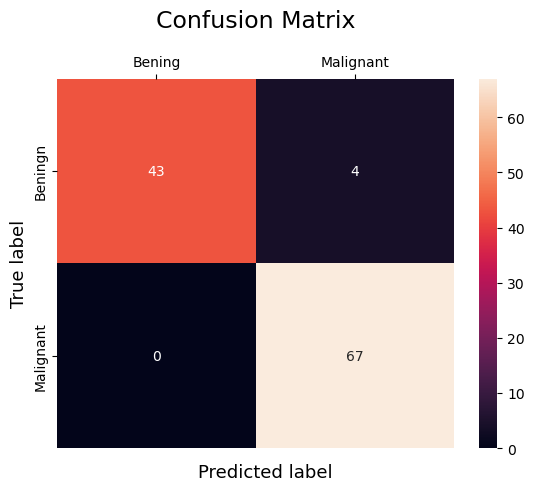

In [3]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, np.argmax(y_pred, -1))

# Plotting the confusion matrix
ax = sns.heatmap(cm, 
            annot=True,
            xticklabels=['Bening','Malignant'],
            yticklabels=['Beningn','Malignant'])
plt.ylabel('True label', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20, loc='center')
ax.set(xlabel="", ylabel="True label")
ax.xaxis.tick_top()

plt.gca().figure.text(0.45, 0.05, 'Predicted label', ha='center', fontsize=13)
plt.show()


### Gridsearch

In [4]:
k_folds = KFold(n_splits=10)

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, batch_size=10, epochs=100))
])
param_grid = {
    'model__epsilon': np.logspace(-4, -1, 4),
}

grid_search = GridSearchCV(estimator=pipeline,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=k_folds,
                  verbose=1,
                  n_jobs=1)
gs = grid_search.fit(X_train, y_train)
print(-gs.best_score_)
print(gs.best_params_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Epoch 0: Accuracy = 0.6161369193154034
Epoch 0: Accuracy = 0.687041564792176
Epoch 0: Accuracy = 0.4352078239608802
Epoch 0: Accuracy = 0.6259168704156479
Epoch 0: Accuracy = 0.4449877750611247
Epoch 0: Accuracy = 0.6073170731707317
Epoch 0: Accuracy = 0.25365853658536586
Epoch 0: Accuracy = 0.8268292682926829
Epoch 0: Accuracy = 0.16585365853658537
Epoch 0: Accuracy = 0.5097560975609756
Epoch 0: Accuracy = 0.36674816625916873
Epoch 0: Accuracy = 0.7017114914425427
Epoch 0: Accuracy = 0.6210268948655256
Epoch 0: Accuracy = 0.45232273838630804
Epoch 0: Accuracy = 0.2469437652811736
Epoch 0: Accuracy = 0.5804878048780487
Epoch 0: Accuracy = 0.5292682926829269
Epoch 0: Accuracy = 0.4
Epoch 0: Accuracy = 0.3975609756097561
Epoch 0: Accuracy = 0.8634146341463415
Epoch 0: Accuracy = 0.8410757946210269
Epoch 0: Accuracy = 0.9070904645476773
Epoch 0: Accuracy = 0.8508557457212714
Epoch 0: Accuracy = 0.8361858190709046
Epoch 0: Accura